# Overview

This week we'll talk about advanced network measures (beyond the degree distribution). We will use these tools to make sense of the network of the Rock Musicians on Wikipedia. 
This is the outline for today:

* Visualization and qualitative analysis of the Rock Music Artists Network
* Properties of the network structure
* Finally some more visualizations

> _Reading_: This week, the reading is mostly for reference. It's for you to have a place to go, if you want more detailed information about the topics that I cover in the video lectures. Thus, I recommend you check out **Chapter 9** of the network science book. In particular, we'll delve into Section 9.4 in the exercises below. We will also talk a little bit about degree correlations - you can read about those in **Chapter 7**.

# Part A: Let's  visualise some more!

For the rest of the course, we will primarily use[`ForceAtlas2`](https://journals.plos.org/plosone/article%3Fid=10.1371/journal.pone.0098679), a layout algorithm which was developed by the creators of the [Gephy graph analysis software](https://gephi.org). IMHO it's the prettiest network layout algorithm & since last year it's been implemented in NetworkX, so it should be easy to use.

*Exercise 1:* Plot the Network using ForceAtlas2. For visualization, you should work with the network from last time, the Giant Connected Component ... and the undirected version.

> * Visualize the network using NetworkX
>   * Node color should depend on the `length_of_content` attribute (see notes from last week).
>   * Node size should depend on the node *degree*
> * Play with the force atlas algorithm parameters to obtain a visualization you like. 

<div class="alert alert-block alert-info">
It's OK to use your LLM as much as needed for this exercise. The only goal is to create a nice visualization.
</div>

In [1]:
import sys
sys.path.append("..")

import json
import networkx as nx
from lib.utils import getPerformerGraph

G = getPerformerGraph()

100%|██████████| 489/489 [00:00<00:00, 44393.30it/s]


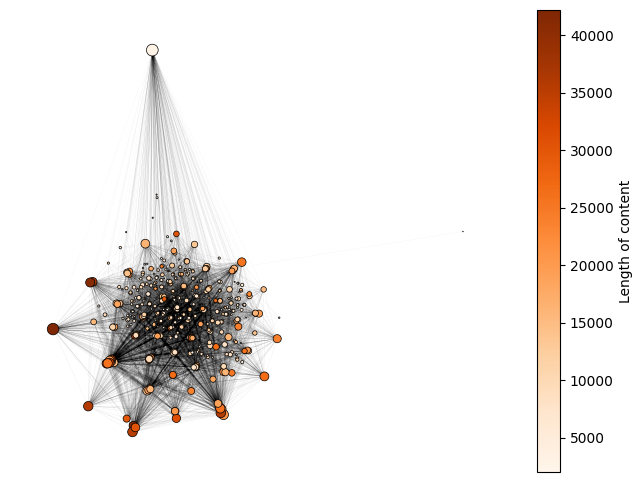

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colors as mcolors

values = [G.nodes[n]['length_of_content'] for n in G.nodes]
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
cmap = cm.Oranges
node_colors = [cmap(norm(v)) for v in values]

sizes = []
node_list = list(G.nodes())
for node in node_list:
    sizes.append(G.degree(node))

args = {
    "node_size": [size / 5 for size in sizes],
    "node_color": node_colors,
    "edge_color": "black",
    "node_shape": "o",
    "linewidths": 0.5,
    "width": 0.01,
    "edgecolors": "black",
    "font_color": "black",
    "with_labels": False,
    "arrows": False
}

fig, ax = plt.subplots(figsize=(8, 6))

node_mass = dict()
for node in node_list:
    node_mass[node] = G.degree(node) + 1

atlas2_args = {
    "max_iter": 350,
    "scaling_ratio": 5.5,
    "gravity": 1.7,
    "dissuade_hubs": True,
    "node_mass": node_mass,
    "node_size": node_mass
}
pos = nx.forceatlas2_layout(G, **atlas2_args)
nx.draw(G, pos=pos, ax=ax, **args)

sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(values)
fig.colorbar(sm, ax=ax, label="Length of content")

plt.show()

*Exercise 2*: We continue with a qualitative inspection of the Wikipedia pages. Inspecting the data manually will develop intuitions that will help us to intepret our quantitative results. We investigate the reasons for links between characters to exist on Wikipedia.

> 1. Consider the nodes with highest in-degree in the network. Open the corresponding Wikipedia page.
>    * Consider the set of neighbours pointing towards the node found above. 
>    * What is the relation between the band/mucisians you identified and their network neighbours? (e.g. did they sing a song together, did one write a song for the other?, etc ...). You don't need to come up with a grand theory of Rock Music here, I just want you to think about how links arise, why the links are there.
>    * Repeat the exercise for the highest out-degree node. 
>    * Are there differences between reasons for out- and in-links? Again, there's no right answer here. I just want you to think about some of the reasons why links may occur in Wikipedia. Answer in your own words.
> 4. Create a scatter plot, where each node is a point, and the axes show in- versus out-degree. That way you can visually inspect the patterns of how in- and out-degree are connected across all the nodes in the network. Comment on what you see.
> 5. Are there any nodes with high(ish) out-degree and with few incoming connections? If yes, open WikiPages of those bands/mucisians and explain what happens?
> 6. Are there any nodes with high in-degree and few going connections? Again, open the WikiPages corresponding to those nodes and explain what happens?

<div class="alert alert-block alert-info">
For this one, I hope you'll limit your LLM use. It's OK to get help in creating the scatter plot, but use NetworkX on your own to identify nodes, and do your own reading and interpreting of Wiki pages.
</div>

In [3]:
with open('../data/rock/performers_data.json', 'r', encoding='utf-8') as f:
    performers = json.load(f)

performers.sort(key=lambda x: int(G.in_degree(x[0])) if isinstance(G.in_degree(x[0]), int) else 0, reverse=True)
print(f'{G.in_degree(performers[1][0])} predecessors of node "{performers[1][0]}":')
for i, p in enumerate(list(G.predecessors(performers[1][0]))):
    print(f'{i}) {p}')

220 predecessors of node "The Beatles":
0) 10cc
1) ABBA
2) AC/DC
3) Bryan Adams
4) Aerosmith
5) The Alan Parsons Project
6) Alice in Chains
7) The Allman Brothers Band
8) Ambrosia (band)
9) America (band)
10) Anthrax (American band)
11) Arcade Fire
12) Arctic Monkeys
13) Asia (band)
14) Avenged Sevenfold
15) Awolnation
16) The B-52s
17) Badfinger
18) The Band
19) Bay City Rollers
20) The Beach Boys
21) Beastie Boys
22) Bee Gees
23) Beck
24) Chuck Berry
25) The Black Keys
26) Black Sabbath
27) Blink-182
28) Blur (band)
29) Bon Jovi
30) Boston (band)
31) David Bowie
32) Bread (band)
33) Breaking Benjamin
34) Jackson Browne
35) Chris de Burgh
36) Bush (British band)
37) The Byrds
38) Cage the Elephant
39) Tracy Chapman
40) Chicago (band)
41) Chubby Checker
42) Eric Clapton
43) The Clash
44) Eddie Cochran
45) Joe Cocker
46) Coldplay
47) Phil Collins
48) Alice Cooper
49) Alice Cooper (band)
50) Chris Cornell
51) Elvis Costello
52) Creed (band)
53) Crosby, Stills, Nash & Young
54) Christophe

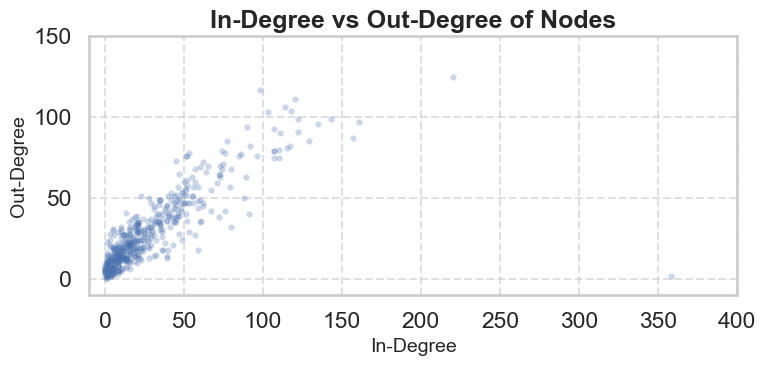

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
in_degrees = [G.in_degree(node) for node in G.nodes()]
out_degrees = [G.out_degree(node) for node in G.nodes()]
degrees = [G.degree(n) for n in G.nodes()]

# Set style
sns.set(style="whitegrid", context="talk")

# Create scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(
    in_degrees,
    out_degrees,
    s=10,                          # marker size
    alpha=0.2,                     # transparency
)

# Add titles and labels
plt.title("In-Degree vs Out-Degree of Nodes", fontsize=18, weight="bold")
plt.xlabel("In-Degree", fontsize=14)
plt.ylabel("Out-Degree", fontsize=14)
plt.xlim([-10, 400])
plt.ylim([-10, 150])

plt.grid(True, linestyle="--", alpha=0.6)

# Tight layout
plt.tight_layout()
plt.show()

In [54]:
interesting = []
for node in G.nodes():
    if G.in_degree(node) < 2 and G.out_degree(node) > 0:
        interesting.append((G.out_degree(node), node))

interesting.sort(reverse=True)
print(interesting)

[(23, 'Poison (band)'), (16, 'Smash Mouth'), (13, 'Awolnation'), (11, 'Golden Earring'), (10, 'The Outfield'), (10, 'The Cab'), (10, 'Highly Suspect'), (10, 'Ambrosia (band)'), (9, 'FireHouse'), (9, 'Chris Rea'), (8, 'Blue October'), (7, 'X Ambassadors'), (7, 'The Boxtones'), (6, 'Montgomery Gentry'), (6, 'Kaleo (band)'), (6, 'Ian Dury'), (6, 'Chris de Burgh'), (6, 'Bread (band)'), (5, 'UB40'), (4, 'Sixto Rodriguez'), (4, 'Michael Martin Murphey'), (4, 'England Dan & John Ford Coley'), (4, 'City and Colour'), (3, 'Smokie (band)'), (3, "Shakin' Stevens"), (3, 'Foster the People'), (3, 'Ben Folds Five'), (2, 'Van Zant (duo)'), (2, 'The Fixx'), (1, 'Tommy James and the Shondells'), (1, 'The Presidents of the United States of America (band)'), (1, 'The Cardigans'), (1, 'Bloodhound Gang')]


# Part B:  Advanced tools 

> **Video lecture**: *Network measures*. There's an updated video below, and if you can't get enough, you can watch the original version from 2015 [here](https://www.youtube.com/watch?v=0uAYpOqVHCU).

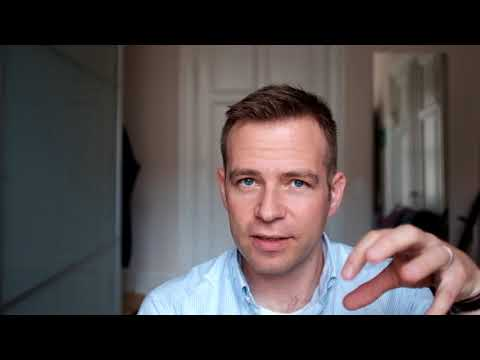

In [6]:
from IPython.display import YouTubeVideo
YouTubeVideo("IOWXZFOyk9Y", width=800, height=450)

*Exercise 3:* Last time we visually analyzed (plotted) the degree distributions of our network. Now, let's analyze it using some of the tools from previous lectures. For this exercise we are going to look at the *directed* graph (rememeber, we asked you to keep one?).

> 1. What are the average, median, mode, minimum and maximum value of the in-degree? And of the out-degree? How do you intepret the results?
> 2. Let's also look at the *[exponent of the degree distribution](http://networksciencebook.com/chapter/4#degree-exponent)* 
>    * To calculate it, you can install [`powerlaw`](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0085777) package (I could not install in conda, so I used `pip install powerlaw`)
>    * Use `powerlaw.Fit(degree).alpha` for fitting
>    * Find the degree exponent for in-, out- and total- degree distribution. Think about what you learned in the book - what does each exponent say about our network?
>    * When analyzing the plots of in- and out- degree distribution last week, did you come up to the same conclusions?
>    * Reflect on the whole power-law thing. Are the degree distributions even power laws? Could a log-normal or exponential distribution be better? How would you find out what the right function to describe the various degree distributions are? 
>    * A long time ago, a group of scientists analyzed the network spanned by **all** of Wikipedia (the paper is called [Wikipedias: Collaborative web-based encyclopedias as complex networks](https://journals.aps.org/pre/abstract/10.1103/PhysRevE.74.016115); to access this paper, use findit.dtu.dk or read the preprint on [arXiv](https://arxiv.org/abs/physics/0602149)). Do your findings correspond to the results described in Chapter **III.A** of that paper? If not, try to give your explanation of why? 
> 3. Plot a heatmap [(Hint here)](https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set) of the the in- versus out- degree for all characters. Zoom in on just the in-degree $[0,20]$ and out-degree $[0,20]$ area of the plot. What is the advantage of using a heatmap over the scatter plot from the previous Exercise (especially for understanding what's going on in this area)?
> 4. Why do you think I want you guys to use a directed graph? Are there questions we can ask using the directed graph that are not possible to answer in the undirected version? Which questions? Can you think of examples when the in/out distinction doesn't matter.
> 5. We have one more metric that we have used, but not investigated so far. The node-attribute `length_of_content`. There are two things to look at.
>    * Firstly, we can verify that more text means more links. If that's true the length should correlate with out-degree. Does it? 
>    * Secondly, and more interestingly, it could be that longer texts means *more famous* characters. And that means more in-links. 
>    * How should you test this? Well, here you are allowed to be **creative**. You may choose the method of your liking to study this question (e.g. look at it visually, test the correlation using [spearman](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html) or [pearson](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html) correlations, fit a curve to the data, you decide). Are both questions true? If yes, which phenomenon is stronger? Explain your results in your own words.

<div class="alert alert-block alert-info">
For this exercise, I also hope you'll limit your LLM use. Especially for the intrepretation parts. It's OK to get help for the heatmap in sub-part 3, maybe also for ideas of how to do the testing in part 5. But do your own interpretation :)
</div>

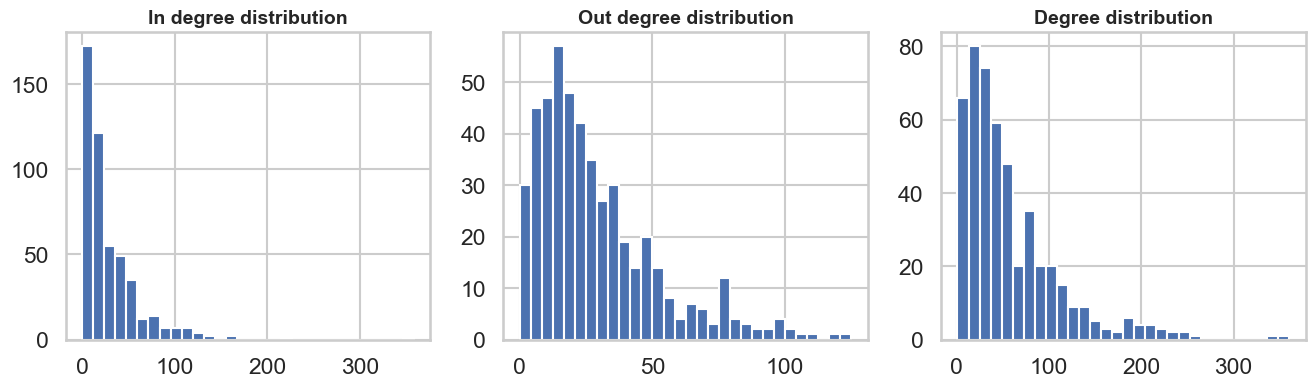

In [145]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))
bins = 30

axes[0].hist(in_degrees, bins=bins)
axes[0].set_title('In degree distribution', fontsize=14, weight='bold')

axes[1].hist(out_degrees, bins=bins)
axes[1].set_title('Out degree distribution', fontsize=14, weight='bold')

axes[2].hist(degrees, bins=bins)
axes[2].set_title('Degree distribution', fontsize=14, weight='bold')

plt.show()

In [ ]:
import numpy as np
from scipy import stats

print(f'IN DEGREE:')
print(f'  - Mean: {np.mean(in_degrees)}')
print(f'  - Median: {np.median(in_degrees)}')
print(f'  - Mode: {stats.mode(in_degrees)[1]}')
print(f'  - Min: {np.min(in_degrees)}')
print(f'  - Max: {np.max(in_degrees)}')

print(f'\nOUT DEGREE:')
print(f'  - Mean: {np.mean(out_degrees)}')
print(f'  - Median: {np.median(out_degrees)}')
print(f'  - Mode: {stats.mode(out_degrees)[1]}')
print(f'  - Min: {np.min(out_degrees)}')
print(f'  - Max: {np.max(out_degrees)}')

IN DEGREE:
  - Mean: 28.85276073619632
  - Median: 18.0
  - Mode: 20
  - Min: 0
  - Max: 358

OUT DEGREE:
  - Mean: 28.85276073619632
  - Median: 22.0
  - Mode: 19
  - Min: 0
  - Max: 125


In [ ]:
import powerlaw

in_degree_sequence = sorted(in_degrees)
in_degree_distribution, _ = np.histogram(in_degree_sequence, bins=range(in_degree_sequence[0], in_degree_sequence[-1] + 2))

out_degree_sequence = sorted(out_degrees)
out_degree_distribution, _ = np.histogram(out_degree_sequence, bins=range(out_degree_sequence[0], out_degree_sequence[-1] + 2))

degree_sequence = sorted(degrees)
degree_distribution, _ = np.histogram(degree_sequence, bins=range(degree_sequence[0], degree_sequence[-1] + 2))

alpha_in = powerlaw.Fit(in_degree_distribution).alpha
alpha_out = powerlaw.Fit(out_degree_distribution).alpha
alpha = powerlaw.Fit(degree_distribution).alpha

print(f'Alpha in: {alpha_in}')
print(f'Alpha out: {alpha_out}')
print(f'Alpha: {alpha}')

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Alpha in: 2.274415933006102
Alpha out: 5.244867848069679
Alpha: 8.242841285946422


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


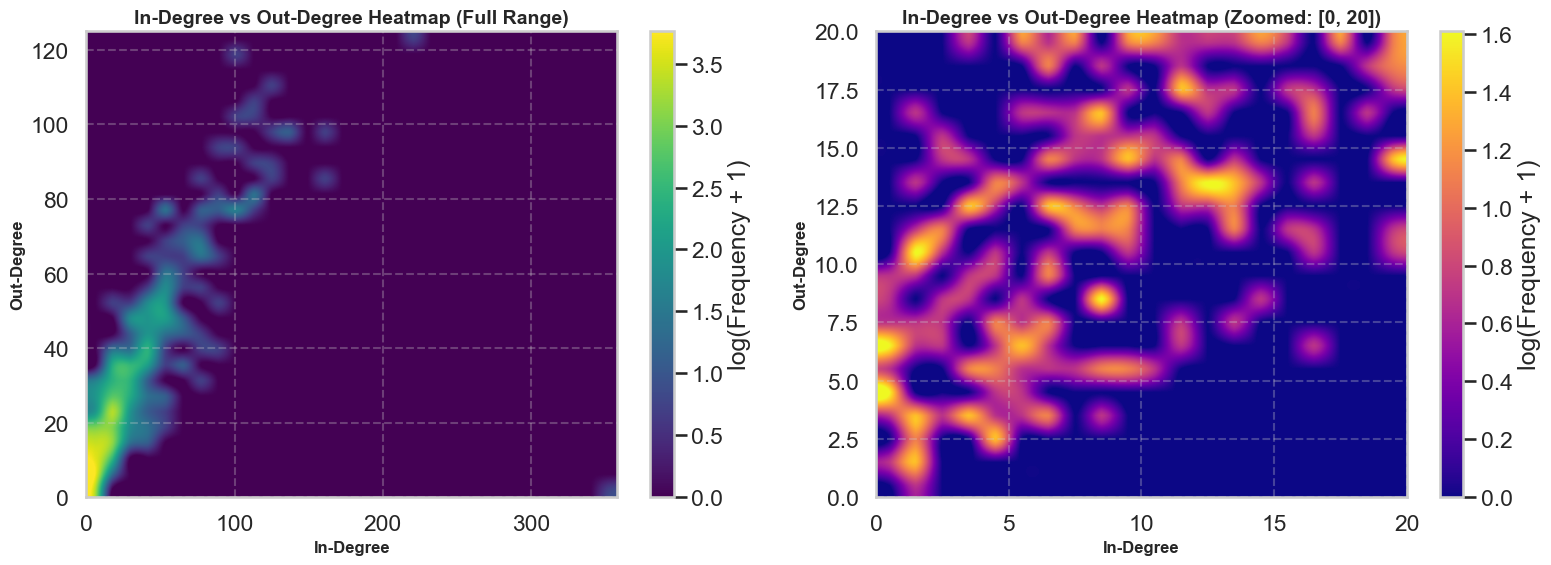

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Create heatmap for full range (optional - can show full distribution)
heatmap_full, xedges_full, yedges_full = np.histogram2d(in_degrees, out_degrees, bins=30)

# Create heatmap zoomed to [0, 20] range as requested in exercise
zoom_range = [0, 20]
bins_zoom = 20

# Filter data points within zoom range
in_out_pairs = [(d1, d2) for d1, d2 in zip(in_degrees, out_degrees) if 0 <= d1 <= 20 and 0 <= d2 <= 20]

if len(in_out_pairs) > 0:
    in_zoom = np.array([p[0] for p in in_out_pairs])
    out_zoom = np.array([p[1] for p in in_out_pairs])
    
    heatmap, xedges, yedges = np.histogram2d(in_zoom, out_zoom, bins=bins_zoom, range=[zoom_range, zoom_range])
    extent = zoom_range + zoom_range
else:
    heatmap = np.zeros((bins_zoom, bins_zoom))
    xedges = yedges = np.linspace(0, 20, bins_zoom + 1)
    extent = zoom_range + zoom_range

# Apply log scaling for better visualization (handle zeros)
heatmap_log = np.log1p(heatmap)  # log(1+x) to handle zeros

# Create figure with subplots: full view and zoomed view
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Full range heatmap
im1 = axes[0].imshow(np.log1p(heatmap_full.T), extent=[0, max(in_degrees), 0, max(out_degrees)], 
                     origin='lower', aspect='auto', cmap='viridis', interpolation='spline16')
axes[0].set_xlabel('In-Degree', fontsize=12, weight='bold')
axes[0].set_ylabel('Out-Degree', fontsize=12, weight='bold')
axes[0].set_title('In-Degree vs Out-Degree Heatmap (Full Range)', fontsize=14, weight='bold')
axes[0].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im1, ax=axes[0], label='log(Frequency + 1)')

# Zoomed heatmap [0, 20] range
im2 = axes[1].imshow(heatmap_log.T, extent=extent, origin='lower', aspect='auto', 
                     cmap='plasma', interpolation='spline16')
axes[1].set_xlabel('In-Degree', fontsize=12, weight='bold')
axes[1].set_ylabel('Out-Degree', fontsize=12, weight='bold')
axes[1].set_title('In-Degree vs Out-Degree Heatmap (Zoomed: [0, 20])', fontsize=14, weight='bold')
axes[1].grid(True, alpha=0.3, linestyle='--')
plt.colorbar(im2, ax=axes[1], label='log(Frequency + 1)')

plt.tight_layout()
plt.show()

In [10]:
locs = [G.nodes[n]['length_of_content'] for n in G.nodes]

in_degree_loc_correlation_spr = stats.spearmanr(in_degrees, locs)
out_degree_loc_correlation_spr = stats.spearmanr(out_degrees, locs)
in_out_degree_correlation_spr = stats.spearmanr(in_degrees, out_degrees)

print(f'SpearmanR correlation')
print(f'In degree / length of content: {in_degree_loc_correlation_spr.statistic}')
print(f'Out degree / length of content: {out_degree_loc_correlation_spr.statistic}')
print(f'In degree / out degree: {in_out_degree_correlation_spr.statistic}')


in_degree_loc_correlation_psr = stats.pearsonr(in_degrees, locs)
out_degree_loc_correlation_psr = stats.pearsonr(out_degrees, locs)
in_out_degree_correlation_psr = stats.pearsonr(in_degrees, out_degrees)

print(f'\nPearsonR correlation')
print(f'In degree / length of content: {in_degree_loc_correlation_psr.statistic}')
print(f'Out degree / length of content: {out_degree_loc_correlation_psr.statistic}')
print(f'In degree / out degree: {in_out_degree_correlation_psr.statistic}')

SpearmanR correlation
In degree / length of content: 0.7128895835566025
Out degree / length of content: 0.7598046722373248
In degree / out degree: 0.8636230748598516

PearsonR correlation
In degree / length of content: 0.6602005241789982
Out degree / length of content: 0.7571744102576496
In degree / out degree: 0.7845387592122441


*Exercise 4:* Centralities, assortativity and more.

Earlier, we found the most connected nodes (using degree centrality). 

Now let's dig in and try to understand more about the network using more advanced features. 

**Note**: Not all of the measures we'll be considering below are defined for directed graphs. Only use the undirected graph when explicitly stated in the exercise. 
> 1. Find the 5 most central characters according to degree centrality. 
> 1. Find the 5 most central characters according to betweenness centrality. 
>    * Repeat Exercise 1 (plotting the network). However, this time use *betweenness centrality* to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph betweenness centrality play in the network? 
> 2. Find the 5 most central characters according to eigenvector centrality. Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). 
>    * Repeat Exercise 1 one final time (depending on which visualization method you liked the most). However, this time use eigenvector centrality to define the size of the node.
>    * What role do you imagine characters with high wikipedia graph eigenvector centrality play? Describe what is different about betweenness centrality and eigenvector centrality using your visualizations as examples.
> 3. Plot the betweenness centrality of nodes vs their degree centrality. Is there a correlation between the two? Did you expect that? Why? 
>     * Repeat the scatter plot using eigenvector centrality instead of betweenness centrality. Do you observe any difference relative to above? Why?
> 4. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect to degree? (e.g. do high-degree characters tend to link to other high-degree characters, and low-degree characters to other low-degree characters?). Provide an interpretation of your answer.
> 5. Is the undirected version of the graph [assortative](https://en.wikipedia.org/wiki/Assortativity) with respect do the `length_of_content` nodal properties? (e.g. do characters with long Wikipedia pages tend to link to other charakters with long Wiki-pages, and *vice versa*?.
>      * Hint: Use [this function](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.attribute_assortativity_coefficient.html#networkx.algorithms.assortativity.attribute_assortativity_coefficient). Provide an interpretation of your answer.
> 6. What is the average shortest path length? Is it similar to the one of a random graph with the same number of nodes $N$  and probablity of connection $p$?
>    * Take a look at the *distribution* of shortest paths for the two networks (create a histogram for each network) to better compare and contrast. Explain what you see in your own words.

<div class="alert alert-block alert-info">
As in the two previous exercises, I hope you'll limit your LLM use. Try to get a sense of working with NetworkX. And to grow your brain, do your own intrepretation parts ... it's difficult, but that's how you grow.</div>

In [11]:
performers.sort(
    key=lambda x: int(G.degree(x[0])) if isinstance(G.degree(x[0]), int) else 0,
    reverse=True
)

for i, p in enumerate(list(performers[:5])):
    print(f'{i + 1}) {p[0]}')

1) AllMusic
2) The Beatles
3) Led Zeppelin
4) The Rolling Stones
5) U2


In [12]:
betweenness_centralities = nx.betweenness_centrality(G)
betweenness_centralities_list = [[k, v] for k, v in sorted(betweenness_centralities.items(), key=lambda item: item[1], reverse=True)]

for i, node in enumerate(betweenness_centralities_list[:5]):
    print(f'{i + 1}) {node[0]}: {node[1]}')

1) The Beatles: 0.05874129111753258
2) Aerosmith: 0.027954271248436326
3) Black Sabbath: 0.025785069648708494
4) Led Zeppelin: 0.02576097572580803
5) Queen (band): 0.02459883559829294


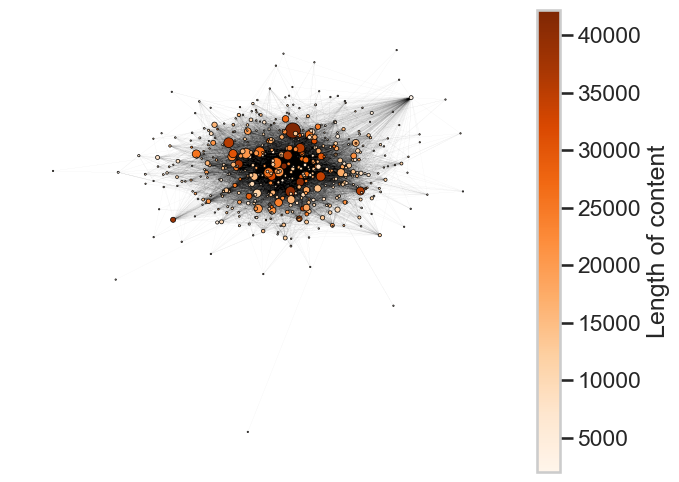

In [13]:
values = [G.nodes[n]['length_of_content'] for n in G.nodes]
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
cmap = cm.Oranges
node_colors = [cmap(norm(v)) for v in values]

sizes = []
node_list = list(G.nodes())
for node in node_list:
    sizes.append(betweenness_centralities[node])

args['node_size'] = [size * 2000 + 1 for size in sizes]
args["node_color"] = node_colors

node_mass = dict()
for i, node in enumerate(node_list):
    node_mass[node] = sizes[i] / 2000 + 1

atlas2_args["node_mass"] = node_mass
atlas2_args["node_size"] = node_mass

fig, ax = plt.subplots(figsize=(8, 6))

pos = nx.forceatlas2_layout(G, **atlas2_args)
nx.draw(G, pos=pos, ax=ax, **args)

sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(values)
fig.colorbar(sm, ax=ax, label="Length of content")

plt.show()

In [14]:
eigenvector_centralities = nx.eigenvector_centrality(G)
eigenvector_centralities_list = [[k, v] for k, v in sorted(eigenvector_centralities.items(), key=lambda item: item[1], reverse=True)]

for i, node in enumerate(eigenvector_centralities_list[:5]):
    print(f'{i}) {node[0]}: {node[1]}')

0) AllMusic: 0.19809020744202252
1) The Beatles: 0.19539628710383877
2) The Rolling Stones: 0.1585108793440913
3) Led Zeppelin: 0.15586709533767854
4) U2: 0.15317663731310138


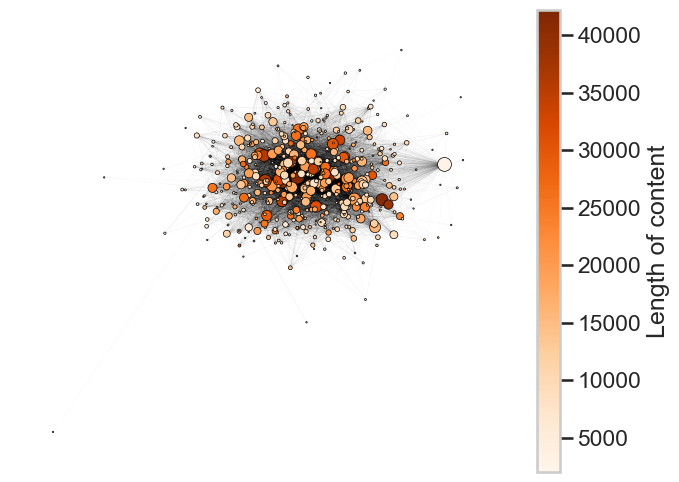

In [15]:
values = [G.nodes[n]['length_of_content'] for n in G.nodes]
norm = mcolors.Normalize(vmin=min(values), vmax=max(values))
cmap = cm.Oranges
node_colors = [cmap(norm(v)) for v in values]

sizes = []
node_list = list(G.nodes())
for node in node_list:
    sizes.append(eigenvector_centralities[node])

args['node_size'] = [size * 500 + 1 for size in sizes]
args["node_color"] = node_colors

node_mass = dict()
for i, node in enumerate(node_list):
    node_mass[node] = sizes[i] / 500 + 1

atlas2_args["node_mass"] = node_mass
atlas2_args["node_size"] = node_mass

fig, ax = plt.subplots(figsize=(8, 6))

pos = nx.forceatlas2_layout(G, **atlas2_args)
nx.draw(G, pos=pos, ax=ax, **args)

sm = cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array(values)
fig.colorbar(sm, ax=ax, label="Length of content")

plt.show()

In [130]:
bcl = [v for k, v in betweenness_centralities.items()]
ecl = [v for k, v in eigenvector_centralities.items()]

betweenness_degree_correlation_spr = stats.spearmanr(bcl, degrees)
eigenvector_degree_correlation_spr = stats.spearmanr(ecl, degrees)

print(f'SpearmanR correlation')
print(f'Betweenness / degree: {betweenness_degree_correlation_spr.statistic}')
print(f'Eigenvector / degree: {eigenvector_degree_correlation_spr.statistic}')


betweenness_degree_correlation_psr = stats.pearsonr(bcl, degrees)
eigenvector_degree_correlation_psr = stats.pearsonr(ecl, degrees)

print(f'\nSpearmanR correlation')
print(f'Betweenness / degree: {betweenness_degree_correlation_psr.statistic}')
print(f'Eigenvector / degree: {eigenvector_degree_correlation_psr.statistic}')

SpearmanR correlation
Betweenness / degree: 0.9001922725672129
Eigenvector / degree: 0.9207682004025894

SpearmanR correlation
Betweenness / degree: 0.8398264265182747
Eigenvector / degree: 0.9382132267014319


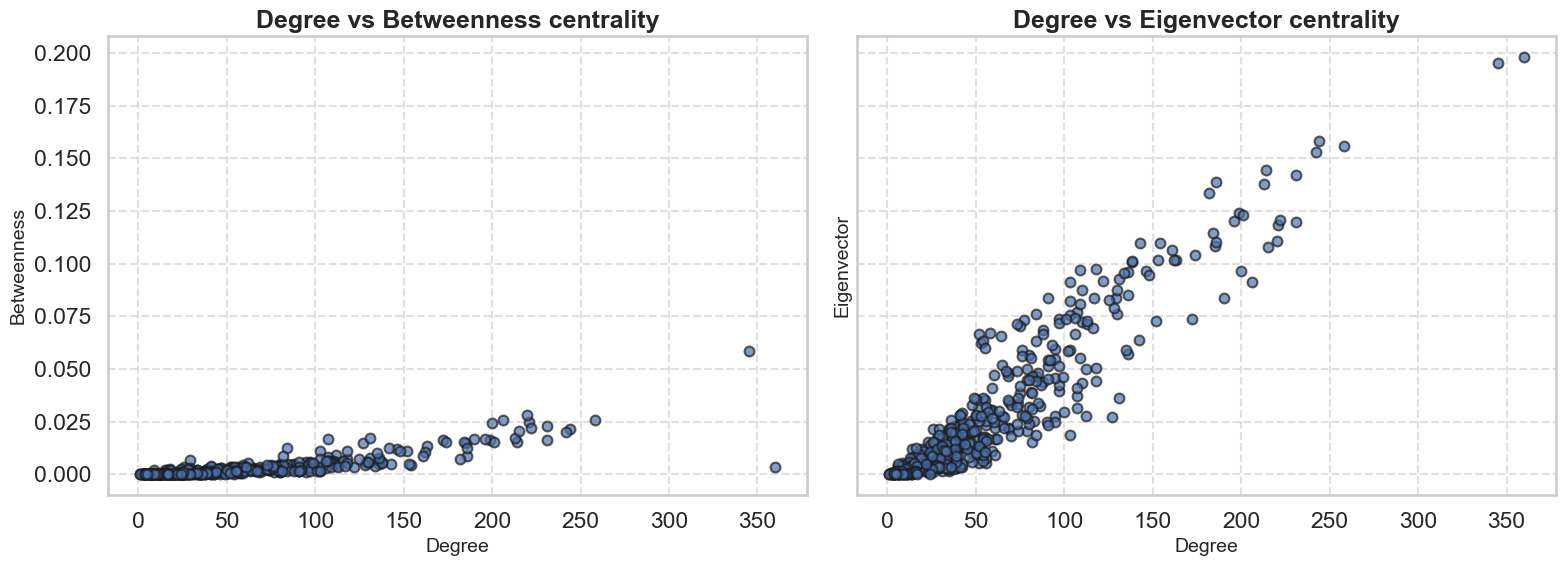

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="talk")

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].scatter(
    degrees,
    bcl,
    s=50,
    alpha=0.7,
    edgecolors="k"
)
axes[0].set_title("Degree vs Betweenness centrality", fontsize=18, weight="bold")
axes[0].set_xlabel("Degree", fontsize=14)
axes[0].set_ylabel("Betweenness", fontsize=14)
axes[0].grid(True, linestyle="--", alpha=0.6)


axes[1].scatter(
    degrees,
    ecl,
    s=50,
    alpha=0.7,
    edgecolors="k"
)
axes[1].set_title("Degree vs Eigenvector centrality", fontsize=18, weight="bold")
axes[1].set_xlabel("Degree", fontsize=14)
axes[1].set_ylabel("Eigenvector", fontsize=14)
axes[1].grid(True, linestyle="--", alpha=0.6)


plt.tight_layout()
plt.show()


In [18]:
UG = nx.to_undirected(G)

ass_coef = nx.degree_assortativity_coefficient(UG)
ass_coef_loc = nx.attribute_assortativity_coefficient(UG, 'length_of_content')

print(f'Assortativity coefficient wrt degree: {ass_coef}')
print(f'Assortativity coefficient wrt length of content: {ass_coef_loc}')

Assortativity coefficient wrt degree: -0.0899353598808383
Assortativity coefficient wrt length of content: -0.0036561319535539137


In [19]:
n = UG.number_of_nodes()
e = UG.number_of_edges()
p = e / (n * (n - 1) / 2)

RG = nx.erdos_renyi_graph(n=n, p=p)

print(f'UG nodes: {n}\nUG edges: {e}\nRG nodes: {RG.number_of_nodes()}\nRG edges: {RG.number_of_edges()}')

print(nx.average_shortest_path_length(UG))
print(nx.average_shortest_path_length(RG))

UG nodes: 489
UG edges: 9724
RG nodes: 489
RG edges: 9730
2.0572261892788894
1.955538234603909


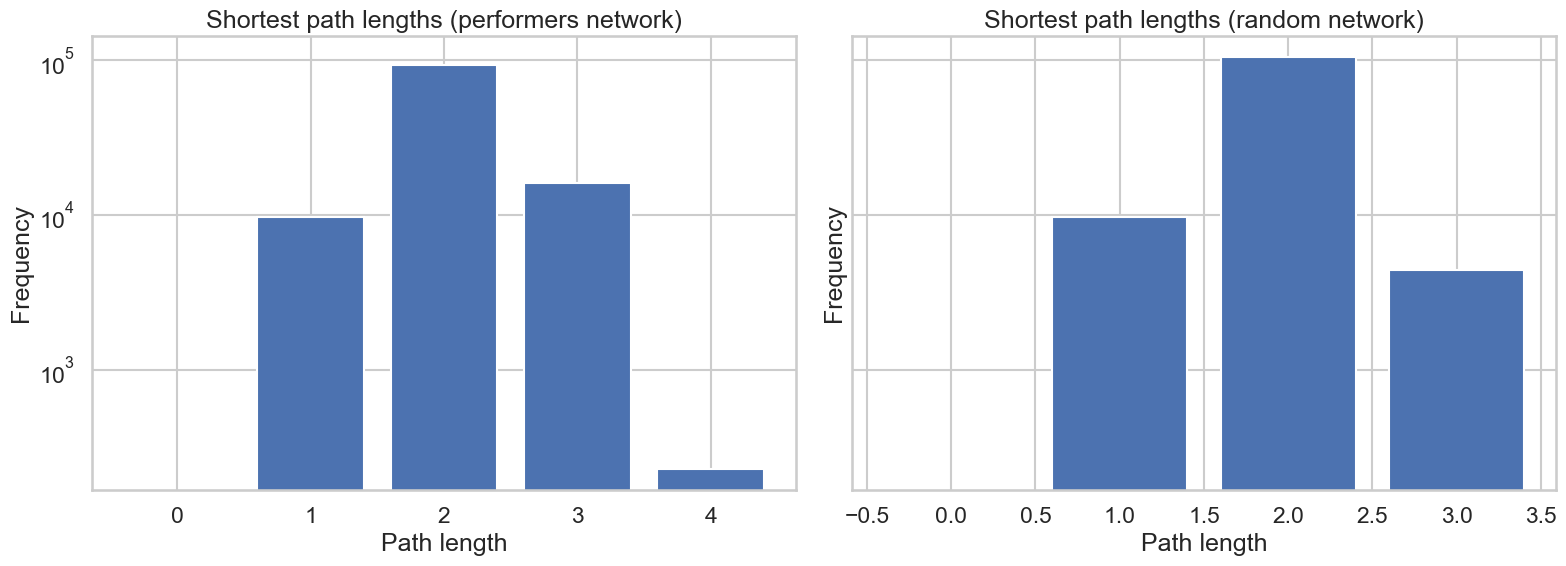

In [20]:
from lib.utils import extract_distribution


UG_path_lengths = nx.shortest_path_length(UG)
UG_paths = []
for source, lengths in UG_path_lengths:
    UG_paths.extend(lengths.values())
UG_bins, UG_heights = extract_distribution(UG_paths)
UG_heights = [b / 2 for b in UG_heights]


RG_path_lengths = nx.shortest_path_length(RG)
RG_paths = []
for source, lengths in RG_path_lengths:
    RG_paths.extend(lengths.values())
RG_path_lengths = nx.shortest_path_length(RG)
RG_bins, RG_heights = extract_distribution(RG_paths)
RG_heights = [b / 2 for b in RG_heights]


fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

axes[0].set_yscale('log')
axes[0].set_xlabel('Path length')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Shortest path lengths (performers network)')
axes[0].bar(x=UG_bins, height=UG_heights)

axes[1].set_yscale('log')
axes[1].set_xlabel('Path length')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Shortest path lengths (random network)')
axes[1].bar(x=RG_bins, height=RG_heights)

plt.tight_layout()
plt.show()

# Part C: Backbones and Network Visualization 

One method to clean up the "hairball"-looking networks, is known as the [backbone method](https://www.pnas.org/doi/10.1073/pnas.0808904106). Sometimes this method is also called the "disparity filter". I explain what it's all about in the video below.

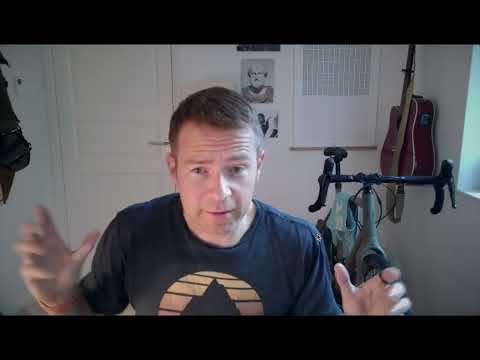

In [21]:
YouTubeVideo("GOvsrVulbsg", width=800, height=450)

There are [many backbone extraction algorithms](https://www.michelecoscia.com/?page_id=287), and I've chosen to talk about the *Disparity Filter* here, because it's the oldest and most commonly used method (so I though you should know about it). Plus, it'll probably be the relevant method for your project.

This choice, however, presents us with a problem: As I explain in the video, the Disparity Filter method *only works on weighted networks*. But our network does not have edge weights in any kind of natural way (since there's usually just a single link between two wiki pages). 


So to get rid of unimportant edges, we'll have to try something different. I present you with three possible methods below. For the first two ones, we'll add weights proportional to the [edge betweenness centrality](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.edge_betweenness_centrality.html). The edge betweenness centrality is just like the node betweenness centrality that you know and love ... only that it's defined for *edges* instead of nodes.

We can create two new weighted networks based on the edge betweenness
 * **Weighted Network 1**: The ***undirected*** Rock Music Network (Giant Connected Component) but with edge weights proportional to the edge betweenness centrality (let's renormalize so that the lowest weight is equal to 1 and the highest weight is equal to 100).
 * **Weighted Network 2**: The ***undirected*** Rock Music Network  (Giant Connected Component) but with edge weights proportional to 1/(edge weight in Weighted Network 1).

The third strategy (resulting in **Weighted network 3**) is to use a method designed for extracting structure from undirected networks: The [**High-Salience Skeleton**](https://www.nature.com/articles/ncomms1847). It's implemented as part of [this backbone extraction package](https://www.michelecoscia.com/?page_id=287)


Now we're ready for the exercise.


*Exercise 5*: Visualizing the Network Backbone

> 1. Extract the network backbone for both Weighted Network 1, 2, and 3. You can implement the disparity filter yourself based on the [scientific paper](https://www.pnas.org/doi/10.1073/pnas.0808904106) or find an implentation on GitHub (there are several ones to choose from ... I like [this implementation](https://www.michelecoscia.com/?page_id=287), which also includes other interesting edge filters). Figure out how your particular backbone extractor works (you may have to inspect the code itself, these packages are not always well documented). Play around with values of $\alpha$ to get an aestetically pleasing visualization (but don't make the resulting network too sparse).
> 2. Plot the resulting three networks using ForceAtlas2, still sizing nodes according to total degree. No need to color them. If your backbone has some disconnected nodes, feel free to not plot them. And remember to calculate a new layout to see how the structure has changed.
> 3. Comment on your results
>    * Do you see any structures in the networks now? Inspect some nodes to get a sense of what the structures captures in the three networks. Describe your findings in your own words.
>    * Weighted network 1, 2, and 3 are very different. In 1 and 2, we have removed edges with low/high edge betweenness centrality respectively and HSH is based on shortest paths. What have the various filters done to the networks? Describe what you see visually, and your explain your thoughts on what we've done to the network structures.

<div class="alert alert-block alert-info">
There's a lot to do today, so knock youself out with your LLM for this exercise, hopefully it can make your life easier (although I hope you'll do a bit of your own thinking, since a lot of complicated conceptual things are going on with the interplay between the backboning and edge betweenness and inverse edge betweenness!)</div>

One final thing. For now, the backbones are mostly for visualization. Especially because the edge weights are a bit artificial. Generally, it's not exactly clear what kind of information we get rid off when removing the non-backbone edges -- and in our case it's even less clear because I've made up two of the methods. Thus, we'll still do the exercises during the following weeks using the full network that preserves all of the connection information.


In [22]:
# Exercise 5: Visualizing the Network Backbone

# Step 1: Create three weighted networks and extract backbones

import matplotlib.pyplot as plt
import networkx as nx

# Get the undirected graph (should already be defined, but let's make sure)
# If UG is not defined, uncomment the next line:
# UG = nx.to_undirected(G)

# Get the largest connected component
if not nx.is_connected(UG):
    largest_cc = max(nx.connected_components(UG), key=len)
    UG = UG.subgraph(largest_cc).copy()

print(f"Working with undirected graph: {UG.number_of_nodes()} nodes, {UG.number_of_edges()} edges")

# Calculate edge betweenness centrality
print("\nCalculating edge betweenness centrality (this may take a while)...")
edge_betweenness = nx.edge_betweenness_centrality(UG, weight=None)

# Normalize edge betweenness to range [1, 100] for Weighted Network 1
eb_values = list(edge_betweenness.values())
eb_min = min(eb_values)
eb_max = max(eb_values)
eb_range = eb_max - eb_min if eb_max != eb_min else 1

# Create Weighted Network 1: weights proportional to edge betweenness (normalized 1-100)
G_weighted1 = UG.copy()
for (u, v), bet in edge_betweenness.items():
    if eb_range > 0:
        normalized_weight = 1 + ((bet - eb_min) / eb_range) * 99
    else:
        normalized_weight = 1
    G_weighted1[u][v]['weight'] = normalized_weight

print(f"Weighted Network 1 created: weights range from {min([d['weight'] for u, v, d in G_weighted1.edges(data=True)])} to {max([d['weight'] for u, v, d in G_weighted1.edges(data=True)])}")

# Create Weighted Network 2: weights proportional to 1/(weight in Network 1)
G_weighted2 = UG.copy()
for u, v, d in G_weighted1.edges(data=True):
    original_weight = d['weight']
    G_weighted2[u][v]['weight'] = 1.0 / original_weight

print(f"Weighted Network 2 created: weights range from {min([d['weight'] for u, v, d in G_weighted2.edges(data=True)]):.4f} to {max([d['weight'] for u, v, d in G_weighted2.edges(data=True)]):.4f}")

# For Weighted Network 3 (High-Salience Skeleton), we'll use a simple approximation
# The true HSS implementation requires the backbone package, but we can approximate it
# by using a threshold on shortest paths importance
print("\nCreating Weighted Network 3 (High-Salience Skeleton approximation)...")
# HSS is based on shortest paths, so we'll weight edges by their usage in shortest paths
G_weighted3 = UG.copy()
edge_usage = {edge: 0 for edge in UG.edges()}

# Sample shortest paths (to save computation time, we sample nodes)
sample_nodes = list(UG.nodes())[::max(1, UG.number_of_nodes() // 50)]  # Sample ~50 nodes
for source in sample_nodes:
    try:
        paths = nx.shortest_path(UG, source)
        for target, path in paths.items():
            if source != target and len(path) > 1:
                for i in range(len(path) - 1):
                    edge = tuple(sorted([path[i], path[i+1]]))
                    if edge in edge_usage:
                        edge_usage[edge] += 1
    except:
        continue

# Normalize usage counts to weights
usage_values = list(edge_usage.values())
usage_max = max(usage_values) if usage_values else 1
for (u, v), usage in edge_usage.items():
    G_weighted3[u][v]['weight'] = usage / usage_max if usage_max > 0 else 0.001

print(f"Weighted Network 3 created: weights based on shortest path usage")

# Now we'll implement the disparity filter based on the scientific paper
# The disparity filter uses statistical significance of edge weights
def disparity_filter(G_weighted, alpha=0.15):
    """
    Extract backbone using disparity filter.
    Based on: Serrano et al. (2009) "Extracting the multiscale backbone of complex weighted networks"
    
    Alpha is the significance level (typically 0.05-0.20)
    Lower alpha = more selective (fewer edges kept)
    Higher alpha = less selective (more edges kept)
    """
    
    G_backbone = nx.Graph()
    G_backbone.add_nodes_from(G_weighted.nodes())
    
    # For each node, calculate node strength (sum of edge weights)
    node_strengths = {}
    for node in G_weighted.nodes():
        strength = sum([G_weighted[node][neigh]['weight'] for neigh in G_weighted.neighbors(node)])
        node_strengths[node] = strength
    
    # Apply disparity filter to each edge
    for u, v, d in G_weighted.edges(data=True):
        weight = d['weight']
        deg_u = G_weighted.degree(u)
        deg_v = G_weighted.degree(v)
        s_u = node_strengths[u]
        s_v = node_strengths[v]
        
        # Calculate normalized weight (p-value approach)
        # For node u: normalized weight = weight / strength
        if s_u > 0 and deg_u > 1:
            p_u = weight / s_u
            # Statistical significance: p-value threshold
            # Simple approximation: keep if normalized weight > alpha threshold
            # (The full method uses more complex statistical tests)
            keep_edge_u = p_u > alpha
        else:
            keep_edge_u = False
            
        if s_v > 0 and deg_v > 1:
            p_v = weight / s_v
            keep_edge_v = p_v > alpha
        else:
            keep_edge_v = False
        
        # Keep edge if it passes the test at either endpoint
        if keep_edge_u or keep_edge_v:
            G_backbone.add_edge(u, v, **d)
    
    # Remove isolated nodes
    isolated = list(nx.isolates(G_backbone))
    G_backbone.remove_nodes_from(isolated)
    
    return G_backbone

# Extract backbones with alpha parameter
print("\nExtracting backbones with disparity filter...")
alpha = 0.15  # You can adjust this to get aesthetically pleasing results

G_backbone1 = disparity_filter(G_weighted1, alpha=alpha)
G_backbone2 = disparity_filter(G_weighted2, alpha=alpha)
G_backbone3 = disparity_filter(G_weighted3, alpha=alpha)

print(f"\nBackbone 1 (high edge betweenness): {G_backbone1.number_of_nodes()} nodes, {G_backbone1.number_of_edges()} edges")
print(f"Backbone 2 (low edge betweenness): {G_backbone2.number_of_nodes()} nodes, {G_backbone2.number_of_edges()} edges")
print(f"Backbone 3 (High-Salience Skeleton): {G_backbone3.number_of_nodes()} nodes, {G_backbone3.number_of_edges()} edges")


Working with undirected graph: 489 nodes, 9724 edges

Calculating edge betweenness centrality (this may take a while)...
Weighted Network 1 created: weights range from 1.0 to 100.0
Weighted Network 2 created: weights range from 0.0100 to 1.0000

Creating Weighted Network 3 (High-Salience Skeleton approximation)...
Weighted Network 3 created: weights based on shortest path usage

Extracting backbones with disparity filter...

Backbone 1 (high edge betweenness): 329 nodes, 340 edges
Backbone 2 (low edge betweenness): 205 nodes, 180 edges
Backbone 3 (High-Salience Skeleton): 472 nodes, 784 edges


ForceAtlas2 not available for Backbone 1: High Edge Betweenness
(Keeps connector edges), using spring layout


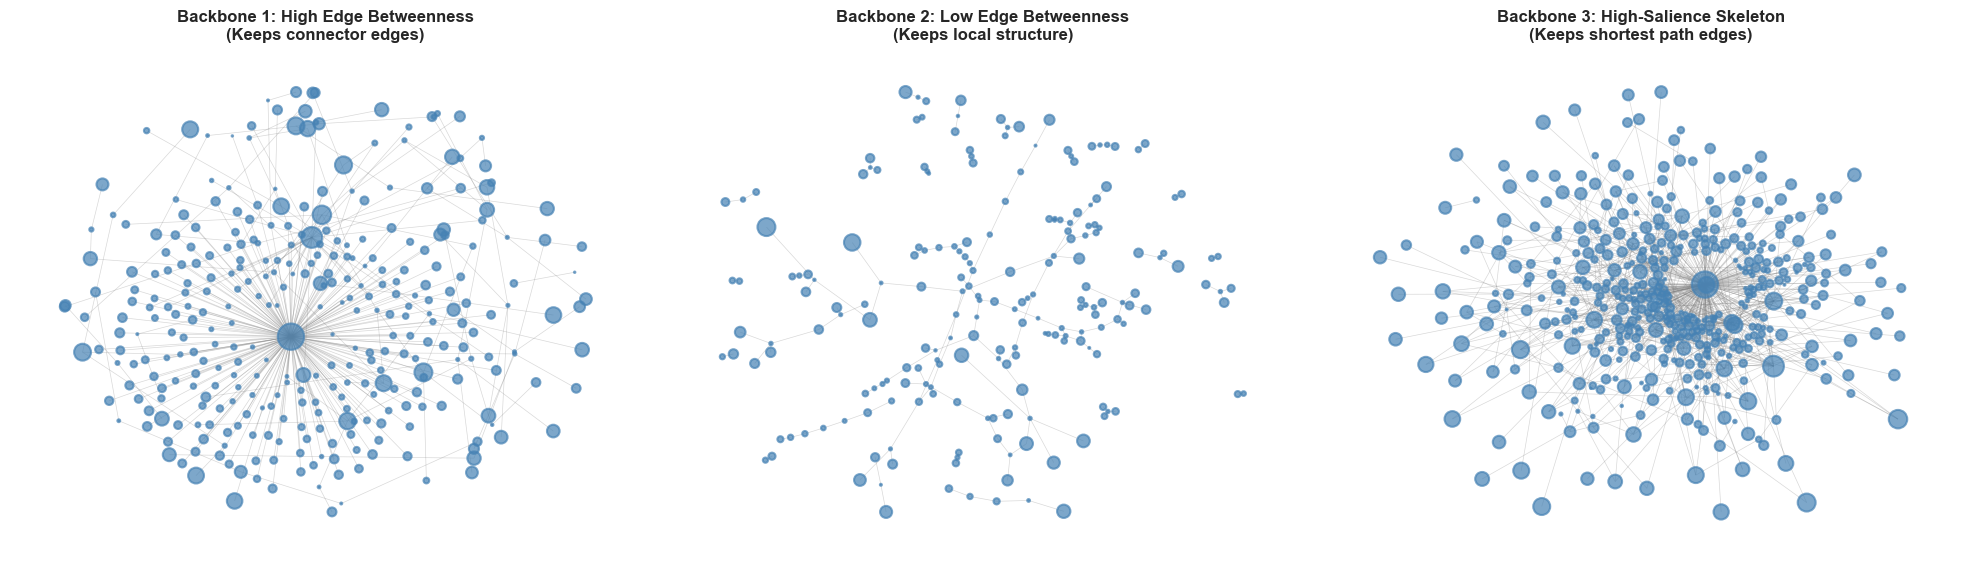


Visualizations complete!


In [23]:
# Step 2: Visualize the three backbones using ForceAtlas2

def visualize_backbone(G_backbone, title, ax):
    """
    Visualize a backbone network using ForceAtlas2.
    Node sizes are proportional to total degree in the original graph.
    """
    if G_backbone.number_of_nodes() == 0:
        ax.text(0.5, 0.5, 'No nodes in backbone', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(title)
        return
    
    # Calculate node sizes based on degree in original UG
    node_sizes = []
    node_list = list(G_backbone.nodes())
    for node in node_list:
        if node in UG:
            node_sizes.append(UG.degree(node))  # Scale for visibility
        else:
            node_sizes.append(10)
    
    # Try ForceAtlas2, fall back to spring layout if not available
    try:
        node_mass = {node: UG.degree(node) + 1 if node in UG else 1 for node in node_list}
        pos = nx.forceatlas2_layout(G_backbone, 
                                   max_iter=350,
                                   scaling_ratio=5.5,
                                   gravity=1.7,
                                   dissuade_hubs=True,
                                   node_mass=node_mass,
                                   node_size=node_mass)
    except:
        print(f"ForceAtlas2 not available for {title}, using spring layout")
        pos = nx.spring_layout(G_backbone, k=1, iterations=50)
    
    # Draw the network
    nx.draw_networkx_nodes(G_backbone, pos, 
                          node_size=node_sizes,
                          node_color='steelblue',
                          alpha=0.7,
                          ax=ax)
    nx.draw_networkx_edges(G_backbone, pos,
                          edge_color='gray',
                          alpha=0.3,
                          width=0.5,
                          ax=ax)
    
    ax.set_title(title, fontsize=12, weight='bold')
    ax.axis('off')

# Create figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Visualize each backbone
visualize_backbone(G_backbone1, 'Backbone 1: High Edge Betweenness\n(Keeps connector edges)', axes[0])
visualize_backbone(G_backbone2, 'Backbone 2: Low Edge Betweenness\n(Keeps local structure)', axes[1])
visualize_backbone(G_backbone3, 'Backbone 3: High-Salience Skeleton\n(Keeps shortest path edges)', axes[2])

plt.tight_layout()
plt.show()

print("\nVisualizations complete!")


## Step 3: Comments on Results

### Structural Analysis

The three backbone extraction methods reveal different aspects of the network structure:

**Backbone 1 (High Edge Betweenness Centrality):**
- This method keeps edges that are on many shortest paths between node pairs
- These are typically "connector" or "bridge" edges that link different parts of the network
- The resulting structure should show a more hierarchical, hub-and-spoke pattern
- High-degree nodes that serve as bridges between communities will be prominent
- This reveals the **global connectivity structure** - how different parts of the network are connected

**Backbone 2 (Low Edge Betweenness Centrality - Inverse):**
- This method keeps edges that are NOT on many shortest paths
- These are typically local connections within communities or clusters
- The resulting structure should show more dense, local clusters with fewer long-range connections
- This reveals the **local community structure** - tight groups of nodes that are well-connected internally but not central to global paths
- You might see isolated communities or modules that are internally cohesive

**Backbone 3 (High-Salience Skeleton):**
- This method is based on shortest path analysis, keeping edges that are important for maintaining shortest paths
- It combines elements of both local and global importance
- The structure should show a more balanced view, preserving both community structure and important connections
- This reveals the **core structural skeleton** of the network - the essential edges for maintaining path connectivity

### Visual Differences

When comparing the three visualizations:
1. **Density**: Backbone 2 should appear denser in local areas, while Backbone 1 should have a more sparse, hub-like structure
2. **Isolation**: Backbone 2 may show more disconnected components or isolated clusters
3. **Hub prominence**: Backbone 1 should make high-degree nodes that serve as bridges more visible
4. **Path preservation**: Backbone 3 should maintain a good balance, showing both communities and connections

### What Each Filter Reveals

The disparity filter with different weighting schemes extracts different types of information:
- **Weighted Network 1** → Removes local, low-betweenness edges → Highlights global structure
- **Weighted Network 2** → Removes high-betweenness bridge edges → Highlights local communities  
- **Weighted Network 3** → Balances both → Shows essential structural skeleton

By comparing these three views, we can understand both the **macroscopic structure** (how the network is organized globally) and the **microscopic structure** (how nodes cluster locally).
